In [1]:
import pandas as pd
import src.helper as hp
data = pd.read_csv('data/churn.csv')


In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data['signup_date'].unique()

In [ ]:
data['last_trip_date'].unique()

In [ ]:
data['last_trip_date'].dt.day

In [2]:
X, y = hp.data_clean('data/churn_train.csv')
X.drop(columns = ['last_trip_day'], inplace = True)
X.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'is_iphone', 'surge_pct', 'trips_in_first_30_days', 'luxury_car_user',
       'weekday_pct', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'use_service', 'signup_day'],
      dtype='object')

In [3]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [ ]:
X.columns

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import textwrap
# X.drop(columns = ['last_trip_date', 'signup_date', 'last_trip_day', 'last_trip_month', 
#                  'last_trip_year', 'signup_day'], inplace=True)







In [ ]:
#MSE_R2(model)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
def Gradient_Boosting_Classifier(X, y, learning_rate, n_estimators):
    # loss could be lad, huber, or quantile. default is ls
    model = GradientBoostingClassifier(learning_rate=learning_rate,   
                                  n_estimators= n_estimators,
                                  random_state= 1)
    model.fit(X, y) 
    return model




In [6]:
def get_model_errors(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    return accuracy, precision, recall

In [7]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, precision_score, r2_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
    
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import textwrap

X_train, X_test, y_train, y_test = train_test_split(X, y)

grad_model = Gradient_Boosting_Classifier(X_train, y_train, 0.1, 100)
accuracy, precision, recall = get_model_errors(grad_model, X_test, y_test)

In [8]:
accuracy, precision, recall

(0.764, 0.764061629849638, 0.7907780979827089)

In [ ]:
X.columns

In [21]:
from sklearn.metrics import accuracy_score
# use staged predict for the n_estimators 
# possibly take out min samples leaf and min samples split
# gradient_grid = {'learning_rate':[0.1], 
#                 'n_estimators':[200],
#                 'max_depth':[2, 3, 4, None],
#                 'subsample':[0.5, 0.6, 0.75, 1.0], 
#                 'min_samples_leaf':[1, 2, 4, 8],
#                 'min_samples_split':[2, 3, 5]}
gradient_grid = {'learning_rate':[0.1],
                'n_estimators': [100],
                'max_depth': [2, 3],
                'subsample':[0.5, 0.75, 1.0],
                'min_samples_leaf':[1, 2],
                'min_samples_split':[2, 3]}
                
# gradient_grid = {'learning_rate':[0.1], 
#                 'n_estimators':[200],
#                 'max_depth':[2, 4, None],
#                 'subsample':[0.5, 0.6, 0.75, 1.0], 
#                 'min_samples_leaf':[1, 2, 4, 8],
#                 'min_samples_split':[2, 3, 5]}

In [22]:
rf_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
rf_gridsearch.fit(X_train, y_train)
rf_gridsearch.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.2min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.5}

In [10]:
grad_model.feature_importances_

array([1.64087348e-02, 2.74421625e-01, 9.41440520e-03, 6.45095514e-03,
       2.89725121e-02, 1.42767029e-01, 1.74927691e-01, 2.39352069e-02,
       2.00247453e-01, 6.42175299e-03, 7.61235995e-02, 1.73582971e-04,
       3.76563549e-02, 2.07909738e-03])


13. Feature ranking:
1. avg_rating_by_driver (0.274422)
2. weekday_pct (0.200247)
3. trips_in_first_30_days (0.174928)
4. surge_pct (0.142767)
5. is_iphone (0.028973)
6. luxury_car_user (0.023935)
7. avg_dist (0.016409)
8. avg_rating_of_driver (0.009414)
9. avg_surge (0.006451)
10. city_Astapor (0.006422)


Text(0.5, 1.0, 'Feature Importances in Gradient Boosting before tuning hyperparameters')

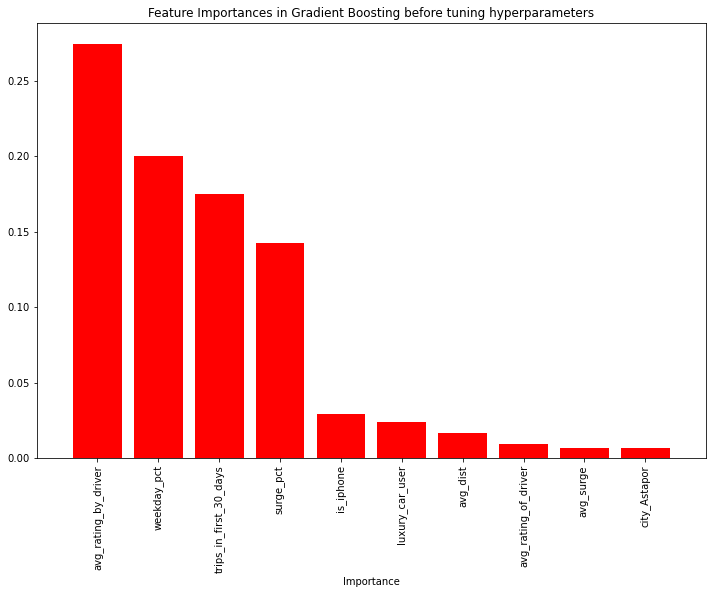

In [15]:
n = 10 # top 10 features
import numpy as np

#importances = forest_fit.feature_importances_[:n]
importances = grad_model.feature_importances_[:n]
# std = np.std([tree.feature_importances_ for tree in grad_model.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
features = list(X.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(10), importances[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances in Gradient Boosting before tuning hyperparameters")

In [24]:
model = GradientBoostingClassifier(learning_rate=0.1,   
                                  n_estimators= 200,
                                    max_depth = 3,
                                   min_samples_leaf = 2,
                                   min_samples_split = 2,
                                   subsample = 0.5,
                                  random_state= 1)

model.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, n_estimators=200, random_state=1,
                           subsample=0.5)

In [25]:
accuracy, precision, recall = get_model_errors(model, X_test, y_test)

In [26]:
accuracy, precision, recall

(0.7674, 0.7723746452223273, 0.7842459173871278)


13. Feature ranking:
1. avg_rating_by_driver (0.274422)
2. weekday_pct (0.200247)
3. trips_in_first_30_days (0.174928)
4. surge_pct (0.142767)
5. is_iphone (0.028973)
6. luxury_car_user (0.023935)
7. avg_dist (0.016409)
8. avg_rating_of_driver (0.009414)
9. avg_surge (0.006451)
10. city_Astapor (0.006422)


Text(0.5, 1.0, 'Feature Importances in Gradient Boosting after tuning hyperparameters')

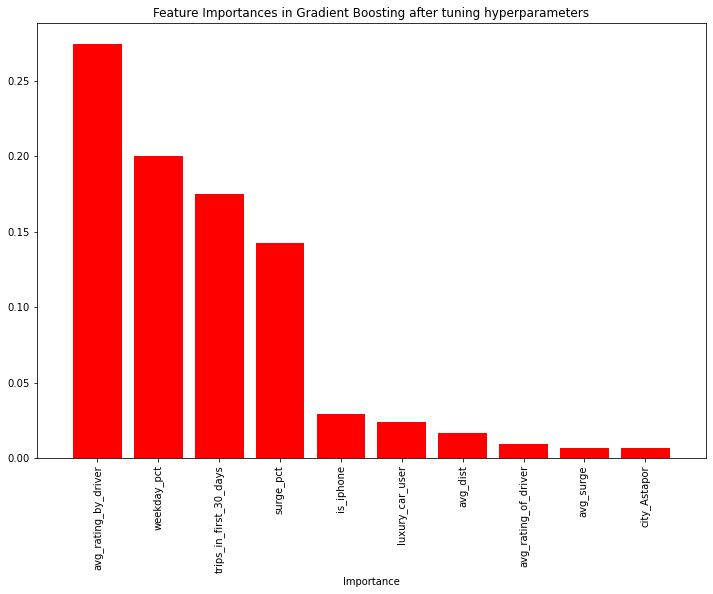

In [28]:
n = 10 # top 10 features
import numpy as np

#importances = forest_fit.feature_importances_[:n]
importances = grad_model.feature_importances_[:n]
# std = np.std([tree.feature_importances_ for tree in grad_model.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
features = list(X.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(10), importances[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances in Gradient Boosting after tuning hyperparameters")